1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg as la

Covariance matrix: 
 [[ 0.98754265  1.01722026  2.99230555]
 [ 1.01722026 10.21149017 12.24593069]
 [ 2.99230555 12.24593069 18.23054179]]
Eigenvalues: 
 [ 2.74516509e+01 -2.41903808e-16  1.97792366e+00]
Eigenvectors: 
 [[-0.11351311 -0.81649658  0.56608136]
 [-0.57979213 -0.40824829 -0.70510596]
 [-0.80681836  0.40824829  0.42705676]]
shapes: (3, 3) (3,) (5000, 5000)
Eigenvalues SVD: 
 [2.74529458e+01 1.97825241e+00 1.30025777e-30]
Eigenvectors SVD: 
 [[-0.11352761  0.56607845 -0.81649658]
 [-0.57977407 -0.70512081 -0.40824829]
 [-0.80682929  0.42703609  0.40824829]]
1.0


Text(0, 0.5, 'x2')

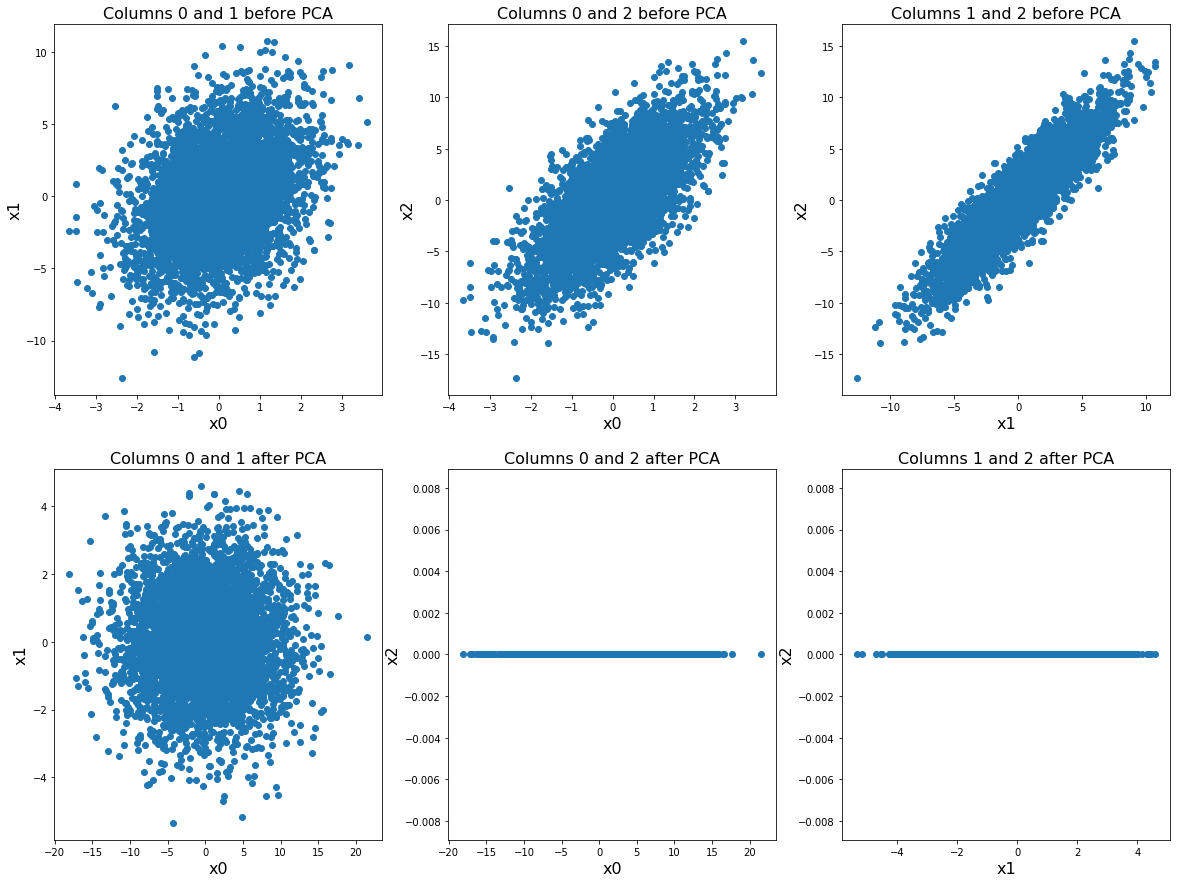

In [2]:
N=5000
x1= np.random.normal(0,1,N)
x2= x1 + np.random.normal(0,3,N)
x3= 2*x1 + x2

dataset=np.array([x1,x2,x3])
#print(dataset)
cov=np.cov(dataset)
print("Covariance matrix: \n", cov)

#Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
l, V = np.linalg.eig(cov) 
print("Eigenvalues: \n", l)
print("Eigenvectors: \n", V)

#Find the eigenvectors and eigenvalues using SVD
U, spectrum, Vt = la.svd(dataset)

print("shapes:", U.shape,  spectrum.shape, Vt.shape)

l_svd = spectrum**2/(N-1)
V_svd = U
print("Eigenvalues SVD: \n", l_svd)
print("Eigenvectors SVD: \n", V_svd)

#Reduce the dimensionality of the system so that at least 99% of the total variability is retained
#The third eigenvalue is almost 0. This is reasonable, in fact the variable x3 is a linear combination of x1 and x2
r=(l_svd[0]+l_svd[1])/np.sum(l_svd)
print(r)

#Redefine the data in the basis yielded by the PCA procedure
dataset_PCA = np.dot(V_svd.T, dataset)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

ax[0,0].scatter(dataset[0], dataset[1])
ax[0,0].set_title("Columns 0 and 1 before PCA", size=16)
ax[0,0].set_xlabel("x0", size=16)
ax[0,0].set_ylabel("x1", size=16)

ax[0,1].scatter(dataset[0], dataset[2])
ax[0,1].set_title("Columns 0 and 2 before PCA", size=16)
ax[0,1].set_xlabel("x0", size=16)
ax[0,1].set_ylabel("x2", size=16)

ax[0,2].scatter(dataset[1], dataset[2])
ax[0,2].set_title("Columns 1 and 2 before PCA", size=16)
ax[0,2].set_xlabel("x1", size=16)
ax[0,2].set_ylabel("x2", size=16)

ax[1,0].scatter(dataset_PCA[0], dataset_PCA[1])
ax[1,0].set_title("Columns 0 and 1 after PCA", size=16)
ax[1,0].set_xlabel("x0", size=16)
ax[1,0].set_ylabel("x1", size=16)

ax[1,1].scatter(dataset_PCA[0], dataset_PCA[2])
ax[1,1].set_title("Columns 0 and 2 after PCA", size=16)
ax[1,1].set_xlabel("x0", size=16)
ax[1,1].set_ylabel("x2", size=16)

ax[1,2].scatter(dataset_PCA[1], dataset_PCA[2])
ax[1,2].set_title("Columns 1 and 2 after PCA", size=16)
ax[1,2].set_xlabel("x1", size=16)
ax[1,2].set_ylabel("x2", size=16)

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

Covariance matrix: 
 [[ 0.99805124  1.00533965  3.00144214]
 [ 1.00533965  9.77506038 11.78573968]
 [ 3.00144214 11.78573968 17.78862396]]
Eigenvalues: 
 [2.65882381e+01 8.61887513e-16 1.97349745e+00]
Eigenvectors: 
 [[-0.11756593 -0.81649658  0.56525356]
 [-0.57472546 -0.40824829 -0.70924183]
 [-0.80985733  0.40824829  0.42126528]]
shapes: (3, 3) (3,) (5000, 5000)
Eigenvalues SVD: 
 [2.65888705e+01 1.97358412e+00 1.13901921e-30]
Eigenvectors SVD: 
 [[-0.11756056  0.56525468 -0.81649658]
 [-0.57473221 -0.70923637 -0.40824829]
 [-0.80985332  0.42127299  0.40824829]]
1.0
Results with noise are very similar to results obtained in exercise 1


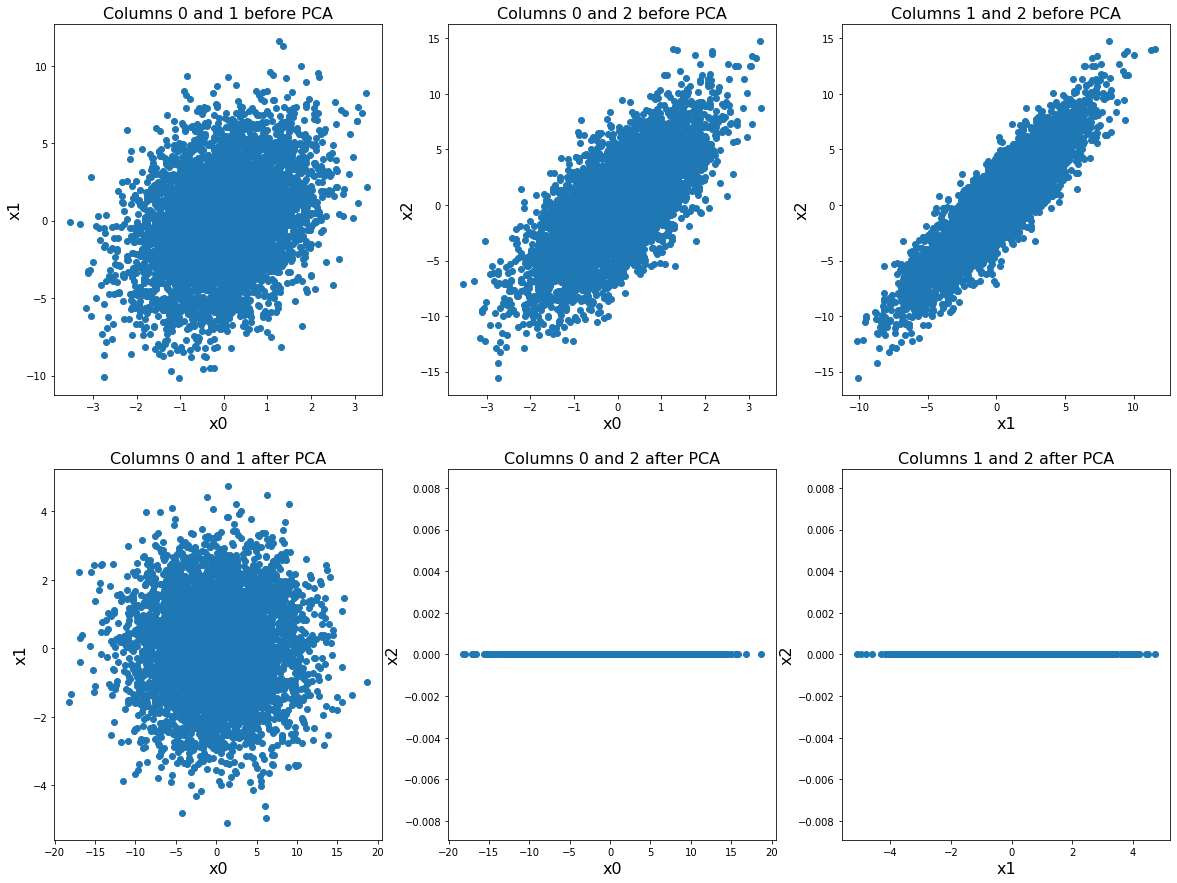

In [3]:
#dataset from previous exercise
N=5000

x1= np.random.normal(0,1,N)
x2= x1 + np.random.normal(0,3,N)
#add noise to x1 and x2
for i in range (0,10):
    std1=np.random.uniform(0.01,0.02)
    x1=x1+np.random.normal(0,std1,N)
    std2=np.random.uniform(0.02,0.06)
    x2=x2+np.random.normal(0,std2,N)
    
x3= 2*x1 + x2  
dataset=np.array([x1,x2,x3])

cov=np.cov(dataset)
print("Covariance matrix: \n", cov)

#SAME ANALYSIS AS BEFORE
#Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
l, V = np.linalg.eig(cov) 
print("Eigenvalues: \n", l)
print("Eigenvectors: \n", V)

#Find the eigenvectors and eigenvalues using SVD
U, spectrum, Vt = la.svd(dataset)

print("shapes:", U.shape,  spectrum.shape, Vt.shape)

l_svd = spectrum**2/(N-1)
V_svd = U
print("Eigenvalues SVD: \n", l_svd)
print("Eigenvectors SVD: \n", V_svd)

#Reduce the dimensionality of the system so that at least 99% of the total variability is retained
#The third eigenvalue is almost 0. This is reasonable, in fact the variable x3 is a linear combination of x1 and x2
r=(l_svd[0]+l_svd[1])/np.sum(l_svd)
print(r)

#Redefine the data in the basis yielded by the PCA procedure
dataset_PCA = np.dot(V_svd.T, dataset)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

ax[0,0].scatter(dataset[0], dataset[1])
ax[0,0].set_title("Columns 0 and 1 before PCA", size=16)
ax[0,0].set_xlabel("x0", size=16)
ax[0,0].set_ylabel("x1", size=16)

ax[0,1].scatter(dataset[0], dataset[2])
ax[0,1].set_title("Columns 0 and 2 before PCA", size=16)
ax[0,1].set_xlabel("x0", size=16)
ax[0,1].set_ylabel("x2", size=16)

ax[0,2].scatter(dataset[1], dataset[2])
ax[0,2].set_title("Columns 1 and 2 before PCA", size=16)
ax[0,2].set_xlabel("x1", size=16)
ax[0,2].set_ylabel("x2", size=16)

ax[1,0].scatter(dataset_PCA[0], dataset_PCA[1])
ax[1,0].set_title("Columns 0 and 1 after PCA", size=16)
ax[1,0].set_xlabel("x0", size=16)
ax[1,0].set_ylabel("x1", size=16)

ax[1,1].scatter(dataset_PCA[0], dataset_PCA[2])
ax[1,1].set_title("Columns 0 and 2 after PCA", size=16)
ax[1,1].set_xlabel("x0", size=16)
ax[1,1].set_ylabel("x2", size=16)

ax[1,2].scatter(dataset_PCA[1], dataset_PCA[2])
ax[1,2].set_title("Columns 1 and 2 after PCA", size=16)
ax[1,2].set_xlabel("x1", size=16)
ax[1,2].set_ylabel("x2", size=16)


print("Results with noise are very similar to results obtained in exercise 1")

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset